In [1]:
import joblib

In [2]:
import shap

In [3]:
import glob

In [4]:
import numpy as np
import pandas as pd

In [5]:
import cartopy.crs as ccrs

ERROR 1: PROJ: proj_create_from_database: Open of /home/jovyan/lustre_scratch/conda-envs/rapids_env/share/proj failed


In [6]:
from SHAP_function import shap_analysis

# SHAP analysis

In [7]:
prov = np.arange(0,53)

100%|===================| 3989/4000 [04:32<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


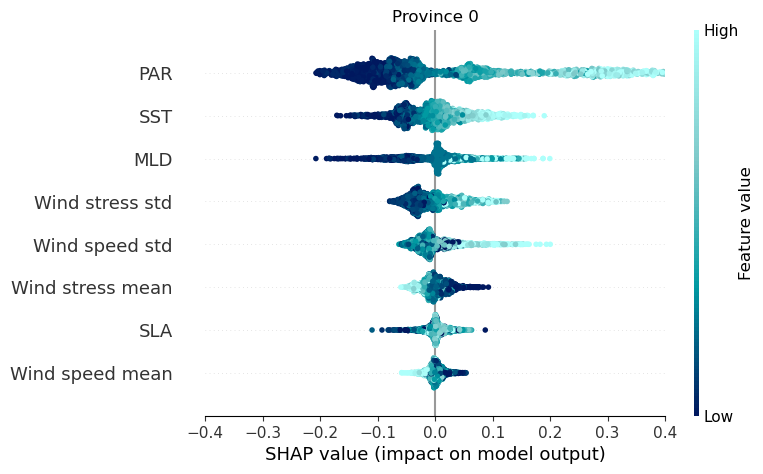

(2000, 8)
[0.043287042043986444, 0.009375975299962926, 0.02724170257275655, 0.016749143536787442, 0.03282663575349052, 0.012630570716593698, 0.04130107960900209, 0.12630534982870723]
['Province_no', 'Score', 'SST', 'Wind speed mean', 'Wind speed std', 'Wind stress mean', 'Wind stress std', 'SLA', 'MLD', 'PAR']
(1, 10)


 26%|=====               | 1048/4000 [02:03<05:46]       

In [ ]:
for i in prov:
    shap_analysis(i)
    

# Load SHAP results

In [8]:
df = pd.read_csv('/home/jovyan/lustre_scratch/Figures/model_shap_analysis_final/model_analysis.csv') #output of SHAP analysis

In [9]:
df = df.set_index('Province_no')

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df2 = df.abs()

In [12]:
df2.drop(columns=['Score'],inplace=True)

In [13]:
# find maximum (highest ranking feature)
df['Feature_1'] = df2.idxmax(axis=1)

In [14]:
#fill maximum in each row with NaN
df2 = df2[df2.ne(df2.max(axis=1), axis=0)] 

In [15]:
# replace NaN with 0
df2.fillna(0,inplace=True)

In [17]:
# find new maximum (second highest ranking feature)
df['Feature_2'] = df2.idxmax(axis=1) 

# Load province file

In [23]:
#Load in longhurst shape file

import fiona
mask_path = '/data/datasets/Projects/TuringCoccolithophoreBlooms/province_files/Longhurst_world_v4_2010.shp'
shapefile = fiona.open(mask_path)

with fiona.open(mask_path) as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [24]:
type(shapes[1])

dict

# Plot Feature maps

In [25]:
colors = {'SST':'#E45756',
          'Wind speed mean':'#72B7B2',
          'Wind speed std':'#54A24B',
          'Wind stress mean':'#FF9DA6',
          'Wind stress std':'#B279A2',
          'SLA':'#F58518', 
          'MLD':'#4C78A8',
          'PAR':'#EECA3B'}

In [26]:
from shapely.geometry import LineString, MultiPolygon, shape, box

0
0.1248859807415019
1
0.0982369111167181
2
(-23.499999999999886, 57.50000000000006, 50.50000000000023, 75.50000000000023)
4
0.0659680027615588
5
0.0575610848403185
10
0.0887008888977231


Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


11
0.1024276501059371
14
0.0539072752387033
15
0.1074821928522567
16
0.0732891907967867
17
0.0943340555555516
19
0.123527668970002
23
0.1091834196460394
26
0.1038783817122501
29
0.0698108597791792
30
0.0742804697746631
31
0.0823286633282053
32
0.1654887665083426
33
0.0685701191327833
42
0.1061502079085322
43
0.1028763992476874
51
0.0976244093002953
52
0.1050605057380849
3
0.0856779051862442


The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.


<Figure size 640x480 with 0 Axes>

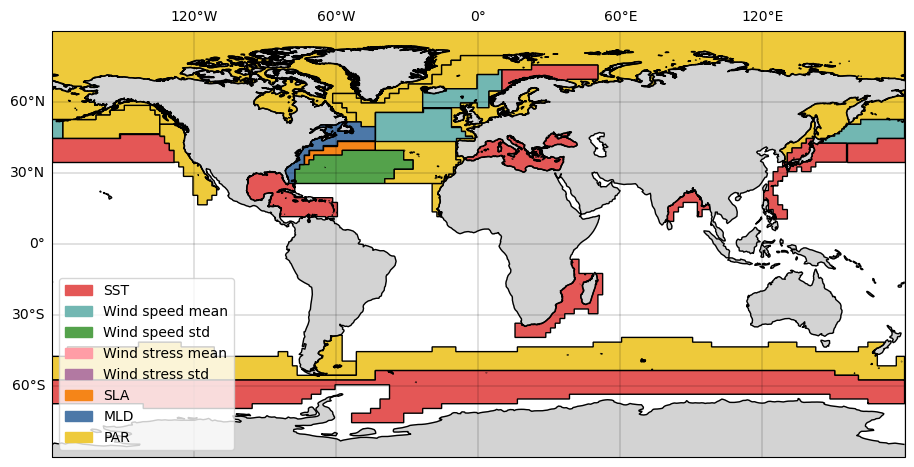

In [27]:
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
import cartopy.feature as cfeat
import matplotlib.patches as mpatches
plt.figure()
# Define the figure and each axis
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(11,8.5))



ax = axs
for i in range(0,len(df)): #,p in enumerate(provinces):
    p = int(df.index[i])

    if p==2:
        nor = box(shape(shapes[p]).bounds[0], shape(shapes[p]).bounds[1], 10, shape(shapes[p]).bounds[3])
        bar = box(10, shape(shapes[p]).bounds[1], shape(shapes[p]).bounds[2], shape(shapes[p]).bounds[3])
        print(shape(shapes[p]).bounds)

        norw_patch = shape(shapes[p]).intersection(nor)
        bar_patch = shape(shapes[p]).intersection(bar)

        ax.add_patch(PolygonPatch(norw_patch, fc=colors['Wind speed mean']))
        ax.add_patch(PolygonPatch(bar_patch, fc=colors['SST']))
        
    else:
        print(df[df.Feature_1[p]][p])
        ax.add_patch(PolygonPatch(shapes[p], fc=colors[df.Feature_1[p]]))
        
        ax.axis('scaled')


ax.add_feature(cfeat.LAND,color='lightgrey')
ax.add_feature(cfeat.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.33, color='k',alpha=0.5)
gl.xlabels_bottom = False
gl.ylabels_right = False
# create the colourbar
ax.set_xlim([-180,180])
ax.set_ylim([-90,90])
plt.legend([mpatches.Patch(color=colors[c]) for c in colors],
           [key for key in colors])

plt.savefig('Feature_map_1.png')

0
1
2
(-23.499999999999886, 57.50000000000006, 50.50000000000023, 75.50000000000023)
4
5
10
11
14
15
16
17
19
23
26
29
30
31
32
33
42
43
51
52
3


<Figure size 640x480 with 0 Axes>

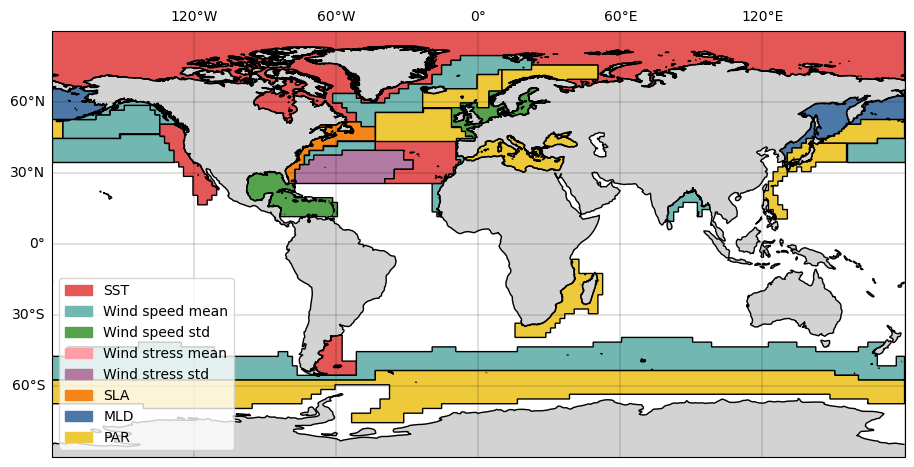

In [28]:
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
import cartopy.feature as cfeat

plt.figure()
# Define the figure and each axis
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(11,8.5))



ax = axs
for i in range(0,len(df)): #,p in enumerate(provinces):
    p = int(df.index[i])

    if p==2:
        nor = box(shape(shapes[p]).bounds[0], shape(shapes[p]).bounds[1], 10, shape(shapes[p]).bounds[3])
        bar = box(10, shape(shapes[p]).bounds[1], shape(shapes[p]).bounds[2], shape(shapes[p]).bounds[3])
        print(shape(shapes[p]).bounds)

        norw_patch = shape(shapes[p]).intersection(nor)
        bar_patch = shape(shapes[p]).intersection(bar)

        ax.add_patch(PolygonPatch(norw_patch, fc=colors['PAR']))
        ax.add_patch(PolygonPatch(bar_patch, fc=colors['PAR']))
        
    else:

        ax.add_patch(PolygonPatch(shapes[p], fc=colors[df.Feature_2[p]]))
        ax.axis('scaled')


ax.add_feature(cfeat.LAND,color='lightgrey')
ax.add_feature(cfeat.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.33, color='k',alpha=0.5)
gl.xlabels_bottom = False
gl.ylabels_right = False
# create the colourbar
ax.set_xlim([-180,180])
ax.set_ylim([-90,90])
plt.legend([mpatches.Patch(color=colors[c]) for c in colors],
           [key for key in colors])

plt.savefig('Feature_map_2.png')